A1.

How many principal components from the PCA algorithm accounts for the data variation of this dataset?

A2.

The goal is to provide the company with a dataset that is dimensionally reduced, making the model simpler, faster, and lowering the possiblity of overfitting.

B1.

The PCA analyzes the data by dimension reduction and is done in two ways, feature elimination or feature extraction. The process of PCA is by transforming variables to be better aligned with the data variance. The new dimension is a linear combination of the orginal. The transformation creates a non linear correlation. The dataset must be noramlized to create equal variance. The PCA function will return the variance of each principal component. The scree plot will display the princal components feature and the variance. The expected outcome will be reducing the amount of variables while being able to predict customer churn accurately (Brems, 2019).

B2.

An assumption of PCA, the variables used are continuous variables, ordinal variables are often used as well (Laerd Statistics).  

C1.

The continuous variables used to perform this analysis includes:

'Children'
'Age'
'Income'
'Outage_sec_perweek'
'Email'
'Contacts'
'Yearly_equip_failure'
'Tenure'
'MonthlyCharge'
'Bandwidth_GB_Year'


C2.

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
%matplotlib inline

In [2]:
df = pd.read_csv('churn_clean.csv')

In [3]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [4]:
df.shape

(10000, 50)

In [5]:
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [6]:
df.dtypes

CaseOrder                 int64
Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSe

In [7]:
non_numeric = df[['City','County','Zip','Job','TimeZone', 'Population',
          'Lat','Lng','UID', 'Customer_id','Interaction','CaseOrder','State','Gender',
          'Churn','Techie','Contract','Port_modem', 'Area','Tablet','Phone',
           'OnlineSecurity','Multiple','OnlineBackup','TechSupport','DeviceProtection','StreamingTV',
          'StreamingMovies','PaperlessBilling','PaymentMethod','Marital','InternetService', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8']]

In [8]:
non_numeric

,City,County,Zip,Job,TimeZone,Population,Lat,Lng,UID,Customer_id,...,Marital,InternetService,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,Point Baker,Prince of Wales-Hyder,99927,Environmental health practitioner,America/Sitka,38,56.25100,-133.37571,e885b299883d4f9fb18e39c75155d990,K409198,...,Widowed,Fiber Optic,5,5,5,3,4,4,3,4
1,West Branch,Ogemaw,48661,"Programmer, multimedia",America/Detroit,10446,44.32893,-84.24080,f2de8bef964785f41a2959829830fb8a,S120509,...,Married,Fiber Optic,3,4,3,3,4,3,4,4
2,Yamhill,Yamhill,97148,Chief Financial Officer,America/Los_Angeles,3735,45.35589,-123.24657,f1784cfa9f6d92ae816197eb175d3c71,K191035,...,Widowed,DSL,4,4,2,4,4,3,3,3
3,Del Mar,San Diego,92014,Solicitor,America/Los_Angeles,13863,32.96687,-117.24798,dc8a365077241bb5cd5ccd305136b05e,D90850,...,Married,DSL,4,4,4,2,5,4,3,3
4,Needville,Fort Bend,77461,Medical illustrator,America/Chicago,11352,29.38012,-95.80673,aabb64a116e83fdc4befc1fbab1663f9,K662701,...,Separated,Fiber Optic,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Mount Holly,Rutland,5758,Sport and exercise psychologist,America/New_York,640,43.43391,-72.78734,9499fb4de537af195d16d046b79fd20a,M324793,...,Married,DSL,3,2,3,3,4,3,2,3
9996,Clarksville,Montgomery,37042,Consulting civil engineer,America/Chicago,77168,36.56907,-87.41694,c09a841117fa81b5c8e19afec2760104,D861732,...,Divorced,Fiber Optic,4,5,5,4,4,5,2,5
9997,Mobeetie,Wheeler,79061,IT technical support officer,America/Chicago,406,35.52039,-100.44180,9c41f212d1e04dca84445019bbc9b41c,I243405,...,Never Married,Fiber Optic,4,4,4,4,4,4,4,5
9998,Carrollton,Carroll,30117,Water engineer,America/New_York,35575,33.58016,-85.13241,3e1f269b40c235a1038863ecf6b7a0df,I641617,...,Separated,Fiber Optic,4,4,6,4,3,3,5,4


In [9]:
df_numeric = df.drop(non_numeric, axis=1)

In [10]:
df_numeric.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [11]:
df_numeric.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [12]:
df_numeric.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [13]:
df_numeric.isnull().sum()

Children                0
Age                     0
Income                  0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
dtype: int64

In [14]:
df_numeric.dtypes

Children                  int64
Age                       int64
Income                  float64
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
dtype: object

In [15]:
df_numeric.shape

(10000, 10)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

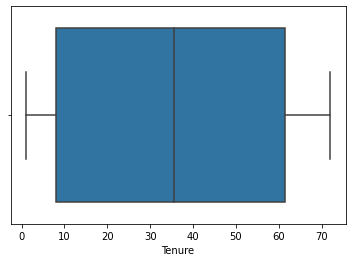

In [16]:
sns.boxplot('Tenure', data=df_numeric)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharge'>

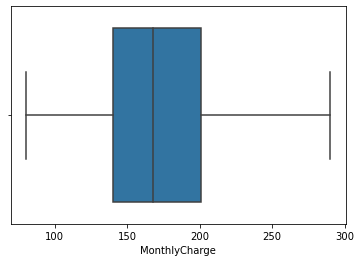

In [17]:
sns.boxplot('MonthlyCharge', data=df_numeric)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bandwidth_GB_Year'>

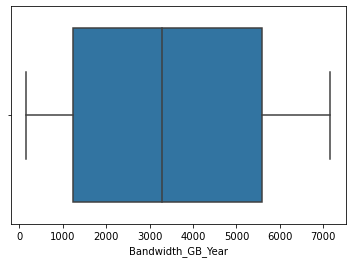

In [18]:
sns.boxplot('Bandwidth_GB_Year', data=df_numeric)

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outage_sec_perweek'>

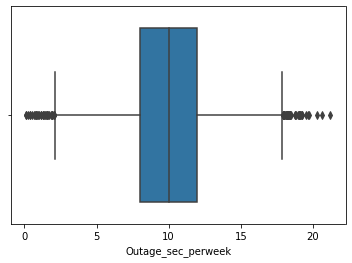

In [19]:
sns.boxplot('Outage_sec_perweek', data=df_numeric)
#although outliers are observed, the outliers does not seem extrenous that will affect the outcome of the algorithm

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Children'>

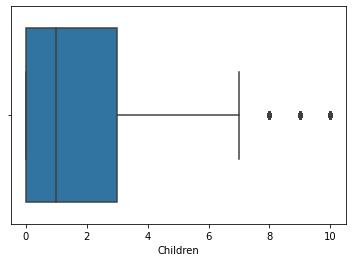

In [20]:
sns.boxplot('Children', data=df_numeric)
#although outliers are observed, the outliers does not seem extrenous that will affect the outcome of the algorithm

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

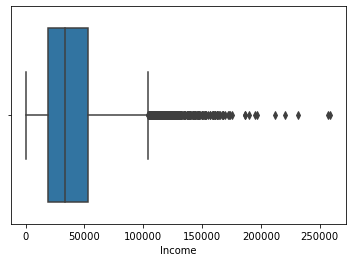

In [21]:
sns.boxplot('Income', data=df_numeric)
#although outliers are observed, the outliers does not seem extrenous that will affect the outcome of the algorithm


C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Yearly_equip_failure'>

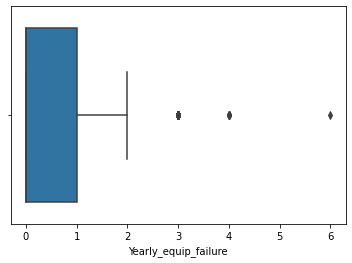

In [22]:
sns.boxplot('Yearly_equip_failure', data=df_numeric)
#although outliers are observed, the outliers does not seem extrenous that will affect the outcome of the algorithm

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Email'>

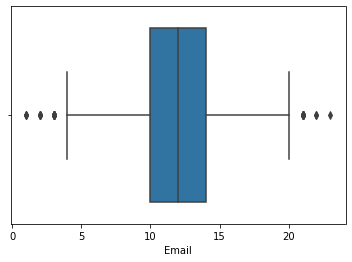

In [23]:
sns.boxplot('Email', data=df_numeric)
#although outliers are observed, the outliers does not seem extrenous that will affect the outcome of the algorithm

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Contacts'>

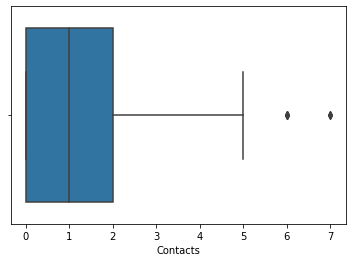

In [24]:
sns.boxplot('Contacts', data=df_numeric)
#although outliers are observed, the outliers does not seem extrenous that will affect the outcome of the algorithm

C:\Users\Michael Le\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

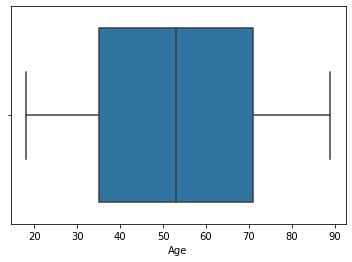

In [25]:
sns.boxplot('Age', data=df_numeric)

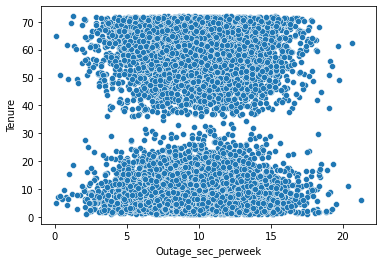

In [26]:
sns.scatterplot(x=df_numeric['Outage_sec_perweek'],y=df_numeric['Tenure'])
plt.show()

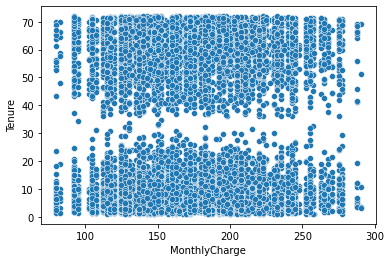

In [27]:
sns.scatterplot(x=df_numeric['MonthlyCharge'],y=df_numeric['Tenure'])
plt.show()

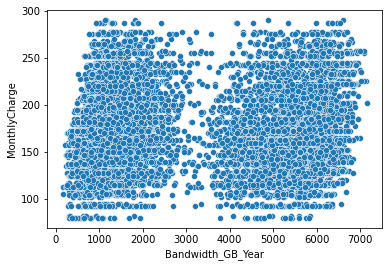

In [28]:
sns.scatterplot(x=df_numeric['Bandwidth_GB_Year'],y=df_numeric['MonthlyCharge'])
plt.show()

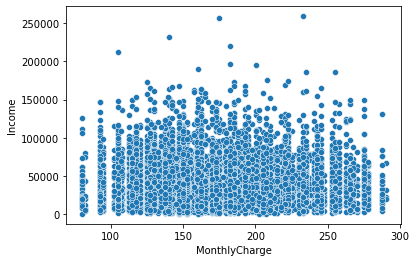

In [29]:
sns.scatterplot(x=df_numeric['MonthlyCharge'],y=df_numeric['Income'])
plt.show()

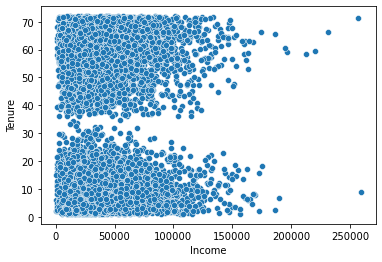

In [30]:
sns.scatterplot(x=df_numeric['Income'],y=df_numeric['Tenure'])
plt.show()

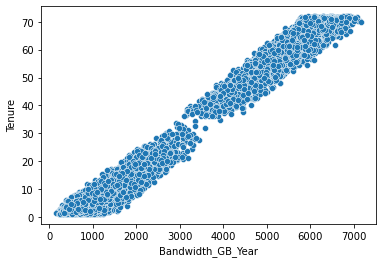

In [31]:
sns.scatterplot(x=df_numeric['Bandwidth_GB_Year'],y=df_numeric['Tenure'])
plt.show()

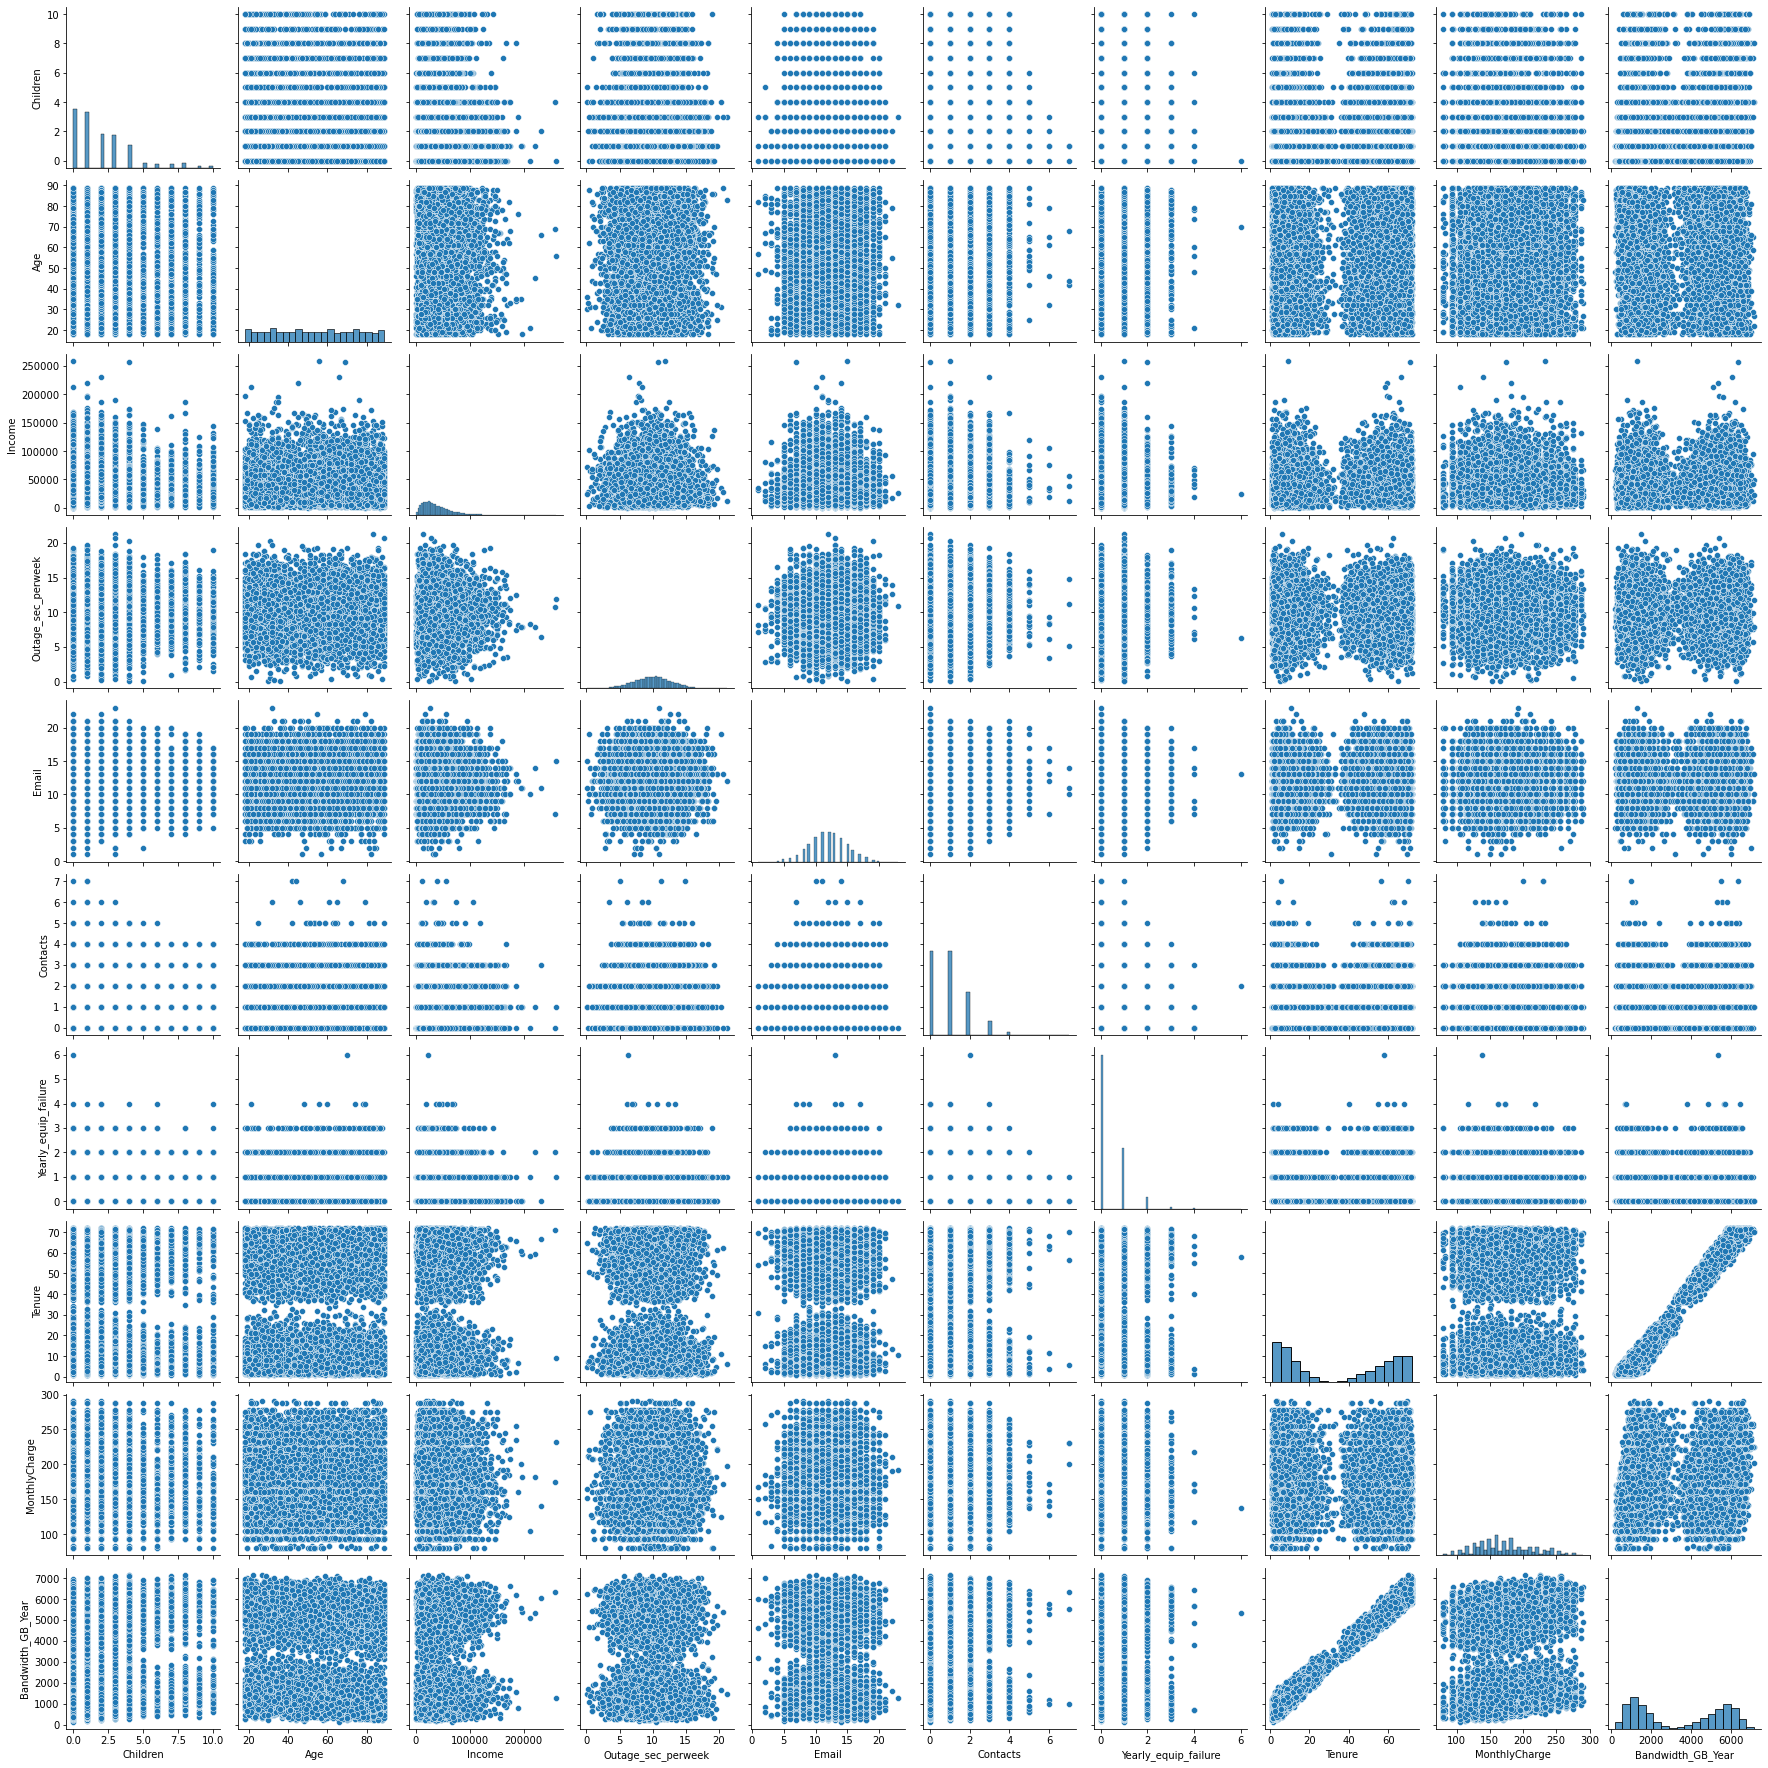

In [32]:
sns.pairplot(df_numeric, diag_kind='hist')

In [33]:
sc = StandardScaler()
sc.fit(df_numeric)
scaled_data_array = sc.transform(df_numeric)
scaled_data = pd.DataFrame(scaled_data_array, columns = df_numeric.columns)
scaled_data.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.972338,0.720925,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,-0.506592,-1.259957,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,0.890646,-0.148730,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,-0.506592,-0.245359,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,-0.972338,1.445638,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184


In [34]:
df_numeric.to_csv('df_prepared_PA2.csv')

D1.

In [35]:
from sklearn.decomposition import PCA
model= PCA()
transformed_model = model.fit_transform(scaled_data)

In [36]:
transformed_model

array([[-1.53676213,  0.17191438,  1.45484287, ..., -0.44059654,
         0.19973168, -0.02685401],
       [-1.65887289, -0.08491886, -0.96146974, ..., -0.68220306,
         1.35986425, -0.03833836],
       [-0.90318002, -1.07864174,  0.1586206 , ...,  0.43878517,
        -0.34079394,  0.06068651],
       ...,
       [ 0.57480682, -0.59276475,  0.70198515, ..., -0.29202759,
         0.09590587, -0.08716622],
       [ 2.01365618,  1.08512645, -1.78677919, ..., -0.15995061,
         0.77765616, -0.06878219],
       [ 1.55302103,  0.69381045, -2.22260756, ..., -0.5685232 ,
         1.09597884, -0.03377038]])

In [37]:
transformed_model.shape

(10000, 10)

In [38]:
print(transformed_model)

[[-1.53676213  0.17191438  1.45484287 ... -0.44059654  0.19973168
  -0.02685401]
 [-1.65887289 -0.08491886 -0.96146974 ... -0.68220306  1.35986425
  -0.03833836]
 [-0.90318002 -1.07864174  0.1586206  ...  0.43878517 -0.34079394
   0.06068651]
 ...
 [ 0.57480682 -0.59276475  0.70198515 ... -0.29202759  0.09590587
  -0.08716622]
 [ 2.01365618  1.08512645 -1.78677919 ... -0.15995061  0.77765616
  -0.06878219]
 [ 1.55302103  0.69381045 -2.22260756 ... -0.5685232   1.09597884
  -0.03377038]]


In [39]:
print(model.components_)

[[ 1.41347924e-02  1.70801624e-03  4.35978315e-03  5.88358241e-03
  -2.07788587e-02  4.17502587e-03  1.75653215e-02  7.05422257e-01
   4.04234226e-02  7.06916770e-01]
 [-5.59467157e-01  4.79835590e-01 -2.23932319e-01  2.12259615e-01
   1.07066510e-01  4.58770120e-01 -1.43554702e-01  1.85082253e-03
   3.44887052e-01 -7.92224048e-03]
 [-2.85318727e-01  4.21944284e-01  2.67257143e-01 -4.79537437e-01
  -4.38464782e-01  1.38442926e-02  3.95130635e-01  2.10784846e-02
  -2.99619131e-01 -1.96605152e-02]
 [ 1.41418217e-01 -8.98051752e-02  1.66467676e-01  5.78437841e-01
  -4.54311812e-01  1.04530277e-01  5.30963217e-01 -4.17351931e-02
   3.29363949e-01 -1.28030621e-02]
 [ 3.16792374e-02 -1.59620872e-01  7.87135785e-01 -2.56863653e-02
  -4.96007075e-03  4.65025757e-01 -3.68863854e-01 -4.96324517e-03
   2.99153688e-02  4.62684898e-03]
 [-5.77211536e-02  1.25005511e-01  2.10454046e-01 -2.43383022e-01
  -1.53996990e-01 -5.50932285e-01 -2.27787102e-01 -3.70435709e-02
   7.04988074e-01  2.61919415e-03

In [40]:
features = range(model.n_components_)

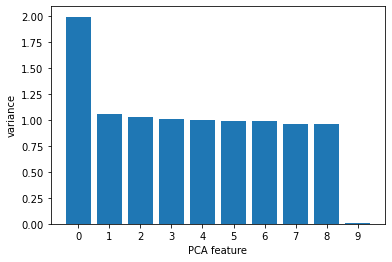

In [41]:
plt.bar(features, model.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

D2.

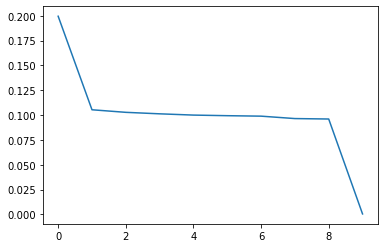

In [42]:
variances = model.explained_variance_ratio_
plt.plot(variances)

The elbow plot shows a principal component of 2.

D3.

In [43]:
print(model.explained_variance_ratio_)

[0.19941337 0.10532293 0.10274512 0.10124573 0.09996956 0.09936806
 0.09889597 0.0964671  0.09602546 0.00054672]


D4.

In [44]:
print(model.explained_variance_ratio_.cumsum())

[0.19941337 0.3047363  0.40748141 0.50872714 0.6086967  0.70806476
 0.80696073 0.90342783 0.99945328 1.        ]


D5.

Looking at the scree-plot the bend of the elbow is seen on x=1, suggeting that the first 2 components accounts for most of the variations even though the two components account for only 30%. 
Component 1 has a variance of about 20% and component 2 has a variance of 10%. It seen from the scree-plot that the components between 1 to 8 are very similar in variance. 
With the variance being at 30% for the two components, this could lead to inaccurate predictions, if we followed with a prediction analysis of two components. 
A question as to why our variance is low is due to the low correlation between the data variables.

E

Sharma, A. (2021, May 3). PCA or principal component analysis on Customer Churn Data. Medium. Retrieved January 22, 2022, from https://medium.com/data-science-on-customer-churn-data/pca-or-principal-component-analysis-on-customer-churn-data-d18ca60397ed 

F

Brems, M. (2019, June 10). A one-stop shop for principal component analysis. Medium. Retrieved January 20, 2022, from https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c 

Statistics, L. (n.d.). Principal components analysis (PCA) using SPSS statistics. How to perform a principal components analysis (PCA) in SPSS Statistics | Laerd Statistics. Retrieved January 20, 2022, from https://statistics.laerd.com/spss-tutorials/principal-components-analysis-pca-using-spss-statistics.php 


G